Gabriel Riegner: 24 JAN 2024  

##### Homework Assignment 2

---

##### 1. How central are you?

**(a)** degree centrality: B = $4$; C = $4$; D = $2$  
**(b)** closeness centrality: B = $\frac{1}{37}$; C = $\frac{1}{27}$; D = $\frac{1}{37}$  
**(c)** betweenness centrality  

indexing the node $\{0, 1, ..., 13\}$, then:

B = $s\in\{0,1,2\}, t\in\{4, ..., 13\}$, $33\times \sigma_{s,t}=1, \sigma_{s,t}(B/3)=1$ $\therefore$ $\beta(B) = 33$  

similarly:  

C = $\beta(C) = 57$  
D = $\beta(D) = 12$

**(d)** eigenvector centrality  

following the lecture slides algorithm for eigenvector centrality (code below), then:

B = $0.323$; C = $0.532$; D = $0.272$

**interpretation**  

Both B and C are most "important" under degree centrality. C is the most "important" for closeness, betweenness, and eigenvector centrality. They differ because each centrality emphasizes different network roles -- local connectivity for degree, average distance for closeness, crossing paths for betweenness, and global influence for eigenvector. 



In [1]:
import numpy as np

# input: the adjacency matrix A
A = np.array(
    [
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # B
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],  # C
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # D
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    ]
)

# compute the principal eigenvalue \lambda^* of A, and eigenvector x
lambdas, xs = np.linalg.eig(A)
lambda_star = np.argmax(lambdas)

# each element of x gives the eigenvector centrality of the corresponding node
print(*zip(["B", "C", "D"], np.round(xs[[3, 5, 6], lambda_star], 3)))

('B', np.float64(0.323)) ('C', np.float64(0.532)) ('D', np.float64(0.272))


##### 2. Hubs and Authorities

algorithm:
1. set authority (A) and hub (H) scores to 1 for all nodes
2. update A to the sum of H of linking nodes
3. update H to the sum of A of linking nodes
4. normalize A and H scores

**(a)**

| **Node** | **1 A** | **1 H** | **2 A** | **2 H** | **Norm A** | **Norm H** |
|----------|-----------------------|-----------------|-----------------------|-----------------|--------------------------|---------------------|
| **A**    | 1                     | 0               | 1                     | 0               | 1/11                    | 0                   |
| **B**    | 1                     | 0               | 1                     | 0               | 1/11                    | 0                   |
| **C**    | 3                     | 0               | 9                     | 0               | 9/11                    | 0                   |
| **D**    | 0                     | 1               | 0                     | 1               | 0                       | 1/29                |
| **E**    | 0                     | 1               | 0                     | 1               | 0                       | 1/29                |
| **F**    | 0                     | 3               | 0                     | 9               | 0                       | 9/29                |
| **G**    | 0                     | 3               | 0                     | 9               | 0                       | 9/29                |
| **H**    | 0                     | 3               | 0                     | 9               | 0                       | 9/29                |

**(b)** 

| **Node** | **1 A** | **1 H** | **2 A** | **2 H** | **Norm A** | **Norm H** |
|----------|-----------------------|-----------------|-----------------------|-----------------|--------------------------|---------------------|
| **A**    | 1                     | 0               | 1                     | 0               | 1/23                    | 0                   |
| **B**    | 1                     | 0               | 5                     | 0               | 5/23                    | 0                   |
| **C**    | 4                     | 0               | 17                    | 0               | 17/23                   | 0                   |
| **D**    | 0                     | 1               | 0                     | 1               | 0                       | 1/74                |
| **E**    | 0                     | 5               | 0                     | 22              | 0                       | 22/74               |
| **F**    | 0                     | 4               | 0                     | 17              | 0                       | 17/74               |
| **G**    | 0                     | 4               | 0                     | 17              | 0                       | 17/74               |
| **H**    | 0                     | 4               | 0                     | 17              | 0                       | 17/74               |

**(c)** In (b), node B has the higher authority score because node E, which links to B, also links to C. This increased E's hub score, which in turn increased B's authority score. Node A's authority score remained the same because it only has one incoming link from D, whose hub score did not change.

##### 3. Centrality Measures

**(a)** plot graphs

Barbell Graph: nodes linking the two large connected components (barbells) have high betweeness and closeness centrality indicating they are communication paths netween the dense clusters. The clusters themselves have high eigenvector, degree, and pagerank centrality, meaning that these nodes have direct connections with many other nodes and are central nodes in the network.  
Les Miserables Graph: nodes closer to the center of this graph structure have higher centrality (across all measures) than nodes at the edge of the graph. That said, the specific nodes that are deamed central differ between centrality measures -- where betweeness, closeness, and degree are more local to specific nodes and eigenvector and pagerank are more evenly dispersed around the center of the network.  
Minnesota Graph: nodes are densely connected without much apparent organizing structure, and centrality measures look like random noise. 

**(b)** correlation for each pair of centrality measures

Barbell Graph: most correlated are eigenvector and degress, and least correlated are betweeness and pagerank. This follows from the structure of the graph with a centralized structure among two clusters of nodes. 
Le Miserables Graph: most correlated are degree and pagerank, and least correlated are betweeness and eigenvector. The moderate correlations across measures imply that the graph structure is more balanced where multiple nodes share influence.  
Minnesota Graph: across all centrality measures, the nodes within and close to Minneapolis have the highest centrality due to the dense road networks in this city, the most populated city in Minnesota. This is especially apparent in the graph of closeness centrality, where the dense road networks in the city center have high closeness (many interconnected roads), and this density dissipates with increasing distance from the city.



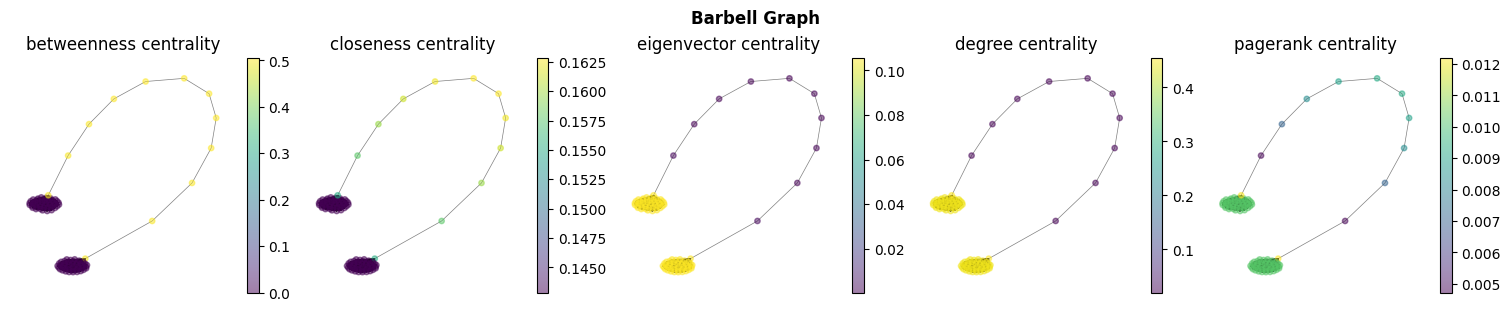

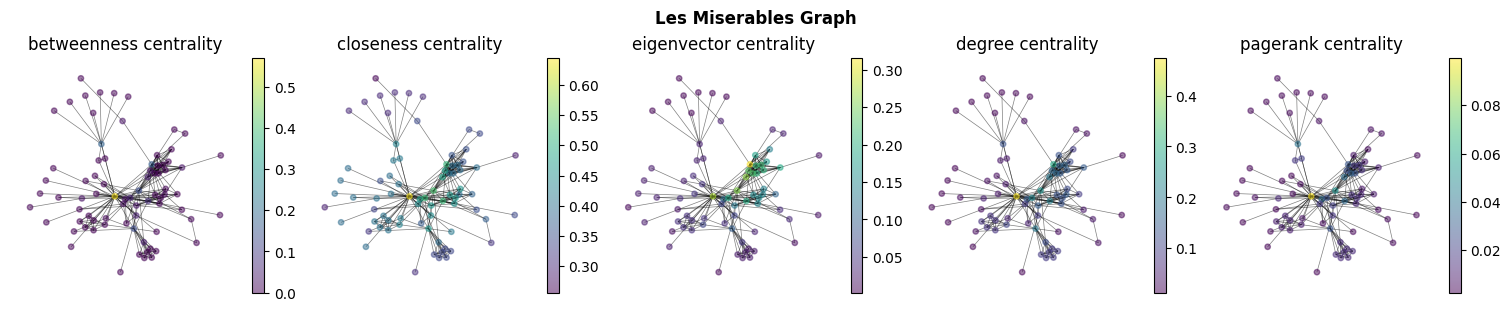

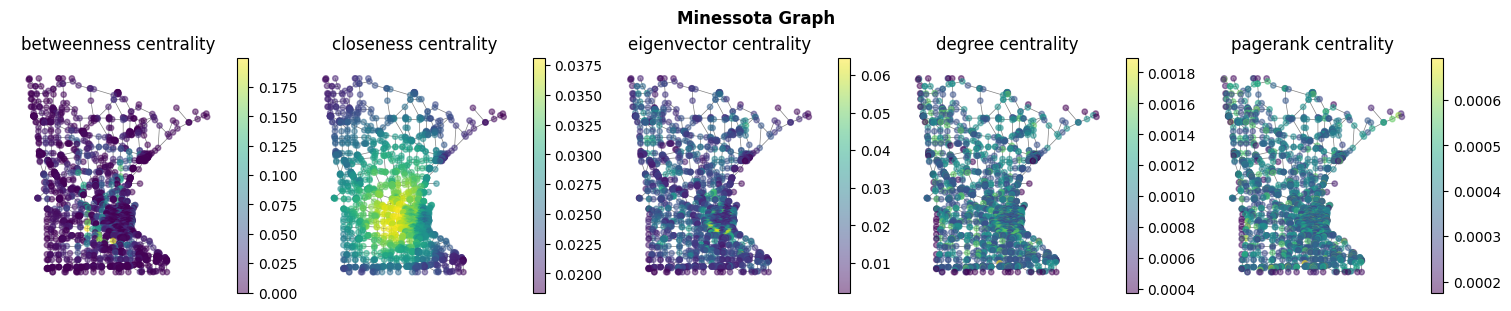

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from IPython.display import display
from scipy.io import loadmat


def calc_centrality(graph):
    centrality_measures = {
        "betweenness": nx.betweenness_centrality(graph),
        "closeness": nx.closeness_centrality(graph),
        "eigenvector": nx.eigenvector_centrality(graph, tol=1e-3),
        "degree": nx.degree_centrality(graph),
        "pagerank": nx.pagerank(graph),
    }
    return centrality_measures


def plot_graph(graph, centrality_measures, graph_name):
    pos_dict = nx.get_node_attributes(graph, "pos")
    pos = pos_dict if pos_dict else nx.spring_layout(graph)
    fig, axs = plt.subplots(ncols=5, figsize=(15, 3), layout="constrained")
    plt.suptitle(graph_name, fontweight="bold")
    for ax, (measure, values) in zip(axs, centrality_measures.items()):
        nodes = nx.draw_networkx_nodes(
            graph,
            pos,
            node_size=15,
            node_color=list(values.values()),
            alpha=0.5,
            cmap=plt.cm.viridis,
            ax=ax,
        )
        _ = nx.draw_networkx_edges(graph, pos, width=0.5, alpha=0.5, ax=ax)
        ax.set_title(f"{measure} centrality")
        ax.axis("off")
        fig.colorbar(nodes, ax=ax)


# load graphs
gr_barbell = nx.barbell_graph(m1=45, m2=10)

gr_les_miserable = nx.les_miserables_graph()

mat_minnesota = loadmat("hw2_minnesota.mat")
gr_minnesota = nx.from_scipy_sparse_array(mat_minnesota["A"])
nx.set_node_attributes(
    gr_minnesota, {i: (x, y) for i, (x, y) in enumerate(mat_minnesota["xy"])}, "pos"
)

# centrality measures
cent_barbell = calc_centrality(gr_barbell)
cent_les_miserable = calc_centrality(gr_les_miserable)
cent_minnesota = calc_centrality(gr_minnesota)

# plot centrality measures
plot_graph(gr_barbell, cent_barbell, "Barbell Graph")
plot_graph(gr_les_miserable, cent_les_miserable, "Les Miserables Graph")
plot_graph(gr_minnesota, cent_minnesota, "Minessota Graph")

In [3]:
def plot_correlation(centrality_measures):
    return (
        pd.DataFrame(centrality_measures)
        .corr()
        .style.background_gradient(cmap="binary", vmin=-1, vmax=1)
    )


display(
    "Barbell Graph",
    plot_correlation(cent_barbell),
    "Les Miserables Graph",
    plot_correlation(cent_les_miserable),
    "Minessota Graph",
    plot_correlation(cent_minnesota),
)

'Barbell Graph'

,betweenness,closeness,eigenvector,degree,pagerank
betweenness,1.000000,0.986711,-0.903891,-0.899411,-0.599190
closeness,0.986711,1.000000,-0.945852,-0.941838,-0.610734
eigenvector,-0.903891,-0.945852,1.000000,0.999905,0.793518
degree,-0.899411,-0.941838,0.999905,1.000000,0.800708
pagerank,-0.599190,-0.610734,0.793518,0.800708,1.000000


'Les Miserables Graph'

,betweenness,closeness,eigenvector,degree,pagerank
betweenness,1.000000,0.628734,0.439081,0.746828,0.849807
closeness,0.628734,1.000000,0.701524,0.799696,0.764262
eigenvector,0.439081,0.701524,1.000000,0.860271,0.659338
degree,0.746828,0.799696,0.860271,1.000000,0.887712
pagerank,0.849807,0.764262,0.659338,0.887712,1.000000


'Minessota Graph'

,betweenness,closeness,eigenvector,degree,pagerank
betweenness,1.000000,0.385909,0.308509,0.303861,0.235227
closeness,0.385909,1.000000,0.284288,0.166570,0.048277
eigenvector,0.308509,0.284288,1.000000,0.726976,0.507620
degree,0.303861,0.166570,0.726976,1.000000,0.950107
pagerank,0.235227,0.048277,0.507620,0.950107,1.000000


##### 4. PageRank

(a) When the outgoing edges of a single node are removed the PageRank of linked nodes increases because the PageRank is concentrated among fewer nodes.  
(b) When a node is removed completely the PageRank of nodes previously linking the removed node decreases, and the overall network's PageRank distribution shifts.  
(c) When the damping factor increases the PageRank becomes more dependent on the link structure of the network (reducing randomness) and the scores become more concentrated among the nodes that are reachable from common paths in the network.

In [4]:
# load adjacency matrix
df = {}
A = np.load("hw2_adj.npy")
G = nx.from_numpy_array(A, create_using=nx.DiGraph)
df["baseline"] = nx.pagerank(G)  # default alpha=0.85

# (a) one node drastically changes its out-degree
A_a = A.copy()
A_a[0, :] = 0  # remove outgoing edges of node 0
G_a = nx.from_numpy_array(A_a, create_using=nx.DiGraph)
df["(a)"] = nx.pagerank(G_a)

# (b) one node is removed completely
G_b = G.copy()
G_b.remove_node(0)
df["(b)"] = nx.pagerank(G_b)

# (c) the damping factor changes from 0.85 to 0.95
df["(c)"] = nx.pagerank(G, alpha=0.95)

df = pd.DataFrame(df)
df.style.background_gradient(cmap="binary")

,baseline,(a),(b),(c)
0,0.073470,0.064695,nan,0.079412
1,0.041896,0.022684,0.054647,0.050392
2,0.012107,0.005407,0.004342,0.011761
3,0.030794,0.031665,0.042041,0.029792
4,0.027896,0.022017,0.025590,0.028655
5,0.105786,0.107169,0.111348,0.108685
6,0.011218,0.012414,0.012229,0.010274
7,0.021223,0.024077,0.021928,0.017827
8,0.010370,0.012784,0.011171,0.007687
9,0.034686,0.031410,0.029795,0.033061
